## Part I -Prosper Loan Data
## By. Muluneh .
### Introduction
This dataset contains loan information of about 113,937 rows with 81 variables on each
loan, including loan amount, borrower rate (or interest rate), current loan status, borrower income, and many others.

I am looking forward to investigate the following questions

##  Data Gathering

In [58]:
#import all packages
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [59]:
# Load the dataset
df_lone = pd.read_csv('prosperLoanData.csv')

In [60]:
# display few rows
df_lone.head()

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
0,1021339766868145413AB3B,193129,2007-08-26 19:09:29.263000000,C,36,Completed,2009-08-14 00:00:00,0.16516,0.1580,0.1380,...,-133.18,0.0,0.0,0.0,0.0,1.0,0,0,0.0,258
1,10273602499503308B223C1,1209647,2014-02-27 08:28:07.900000000,NaN,36,Current,NaN,0.12016,0.0920,0.0820,...,0.00,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
2,0EE9337825851032864889A,81716,2007-01-05 15:00:47.090000000,HR,36,Completed,2009-12-17 00:00:00,0.28269,0.2750,0.2400,...,-24.20,0.0,0.0,0.0,0.0,1.0,0,0,0.0,41
3,0EF5356002482715299901A,658116,2012-10-22 11:02:35.010000000,NaN,36,Current,NaN,0.12528,0.0974,0.0874,...,-108.01,0.0,0.0,0.0,0.0,1.0,0,0,0.0,158
4,0F023589499656230C5E3E2,909464,2013-09-14 18:38:39.097000000,NaN,36,Current,NaN,0.24614,0.2085,0.1985,...,-60.27,0.0,0.0,0.0,0.0,1.0,0,0,0.0,20


In [61]:
# display the dimension
df_lone.shape

(113937, 81)

In [62]:
# Check the data type and null values
df_lone.info();

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 81 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   ListingKey                           113937 non-null  object 
 1   ListingNumber                        113937 non-null  int64  
 2   ListingCreationDate                  113937 non-null  object 
 3   CreditGrade                          28953 non-null   object 
 4   Term                                 113937 non-null  int64  
 5   LoanStatus                           113937 non-null  object 
 6   ClosedDate                           55089 non-null   object 
 7   BorrowerAPR                          113912 non-null  float64
 8   BorrowerRate                         113937 non-null  float64
 9   LenderYield                          113937 non-null  float64
 10  EstimatedEffectiveYield              84853 non-null   float64
 11  EstimatedLoss

## Data Assessing and Cleaning
<ol>
<li>Choose some columns from the dataset which is  interested for the analysis  </li>
<li>Drop duplicated rows according to the datset description </li>
<li>Removed rows with null values.</li>
<li>Remove the missed data columns</li>
</ol>

In [63]:
# choose some columns from the dataset which is interested for the analysis
column_list = ['Term','LoanStatus','BorrowerAPR','LenderYield','EstimatedLoss','ProsperRating (Alpha)',
               'BorrowerState','Occupation','EmploymentStatus','DebtToIncomeRatio','IncomeRange',
               'StatedMonthlyIncome','LoanOriginalAmount','MonthlyLoanPayment','PercentFunded','Investors']

In [64]:
# from the Selected dataset create a new data frame
df_new = df_lone[column_list]
df_new.sample(10)

,Term,LoanStatus,BorrowerAPR,LenderYield,EstimatedLoss,ProsperRating (Alpha),BorrowerState,Occupation,EmploymentStatus,DebtToIncomeRatio,IncomeRange,StatedMonthlyIncome,LoanOriginalAmount,MonthlyLoanPayment,PercentFunded,Investors
76177,60,Current,0.18068,0.1470,0.0649,C,NJ,Other,Employed,0.09,"$100,000+",8333.333333,15000,362.38,1.0,1
62765,36,Current,0.13301,0.0950,0.0274,A,CT,Executive,Employed,0.23,"$75,000-99,999",6750.000000,4500,146.26,1.0,1
45852,36,Completed,0.09568,0.0838,NaN,NaN,OR,Attorney,Full-time,0.07,"$75,000-99,999",6569.000000,9999,317.41,1.0,290
106183,36,Chargedoff,0.35643,0.3099,0.1470,E,WA,Skilled Labor,Employed,0.16,"$25,000-49,999",3083.333333,4000,174.20,1.0,82
37641,36,Completed,0.25781,0.2099,0.0925,D,PA,Food Service,Employed,0.94,"$25,000-49,999",3083.333333,15000,572.78,1.0,122
17262,36,Current,0.30285,0.2539,0.1225,E,NY,Other,Employed,0.16,"$50,000-74,999",5833.333333,4000,161.99,1.0,3
22558,36,Completed,0.26495,0.2320,NaN,NaN,GA,Teacher,Full-time,0.38,"$1-24,999",1000.000000,2600,102.28,1.0,53
42508,36,Current,0.29510,0.2499,0.1120,D,TX,Teacher,Employed,0.20,"$50,000-74,999",4583.333333,7000,282.00,1.0,14
83633,36,Chargedoff,0.22744,0.1900,NaN,NaN,AZ,Accountant/CPA,Full-time,0.10,"$50,000-74,999",5454.500000,7000,267.33,1.0,89
64122,36,Current,0.31975,0.2700,0.1475,E,CO,Teacher,Employed,0.04,"$25,000-49,999",3416.666667,2000,82.73,1.0,1


In [65]:
# display the shape
df_new.shape

(113937, 16)

In [66]:
# check the duplicated row in the data frame
print(df_new.duplicated().sum())

875


In [67]:
# Drop duplicated rows according to the dataset description.
df_new = df_new.drop_duplicates()

In [68]:
# check null values
df_new.isna().sum()

Term                         0
LoanStatus                   0
BorrowerAPR                 25
LenderYield                  0
EstimatedLoss            29083
ProsperRating (Alpha)    29083
BorrowerState             5515
Occupation                3529
EmploymentStatus          2255
DebtToIncomeRatio         8470
IncomeRange                  0
StatedMonthlyIncome          0
LoanOriginalAmount           0
MonthlyLoanPayment           0
PercentFunded                0
Investors                    0
dtype: int64

In [69]:
# Removed rows with null values
df_new.dropna(inplace=True)

In [70]:
# check the change
df_new.isna().sum()

Term                     0
LoanStatus               0
BorrowerAPR              0
LenderYield              0
EstimatedLoss            0
ProsperRating (Alpha)    0
BorrowerState            0
Occupation               0
EmploymentStatus         0
DebtToIncomeRatio        0
IncomeRange              0
StatedMonthlyIncome      0
LoanOriginalAmount       0
MonthlyLoanPayment       0
PercentFunded            0
Investors                0
dtype: int64

In [71]:
# check the data types 
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 75493 entries, 1 to 113936
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Term                   75493 non-null  int64  
 1   LoanStatus             75493 non-null  object 
 2   BorrowerAPR            75493 non-null  float64
 3   LenderYield            75493 non-null  float64
 4   EstimatedLoss          75493 non-null  float64
 5   ProsperRating (Alpha)  75493 non-null  object 
 6   BorrowerState          75493 non-null  object 
 7   Occupation             75493 non-null  object 
 8   EmploymentStatus       75493 non-null  object 
 9   DebtToIncomeRatio      75493 non-null  float64
 10  IncomeRange            75493 non-null  object 
 11  StatedMonthlyIncome    75493 non-null  float64
 12  LoanOriginalAmount     75493 non-null  int64  
 13  MonthlyLoanPayment     75493 non-null  float64
 14  PercentFunded          75493 non-null  float64
 15  I

In [72]:
df_new.shape

(75493, 16)

### What is the structure of your dataset?
> We have 75,489 rows and 16 columns or features. From describe function it seems most of the features are numeric, some are categorical and others are time/periodical features 

### What is/are the main feature(s) of interest in your dataset?

> I am interested in borrowers features and features related to loan or those that affect loan performance to answe the following quations.
- What factors affect a loan’s outcome status?
- What affects the borrower’s APR or interest rate?
- Are there differences between loans depending on how large the original loan amount was?


### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> In this analysis I will be focusing on the following columns that I suspect has effect on the loan performance  

``` 
['Term','LoanStatus','BorrowerAPR','LenderYield','EstimatedLoss','ProsperRating (Alpha)','BorrowerState','Occupation','EmploymentStatus','DebtToIncomeRatio','IncomeRange','StatedMonthlyIncome','LoanOriginalAmount','MonthlyLoanPayment','PercentFunded','Investors']
```
> 

In [73]:
# rename ProsperRating (Alpha) to ProsperRating
df_new.rename(columns = {'ProsperRating (Alpha)':'ProsperRating'}, inplace = True)

In [74]:
#check the change
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 75493 entries, 1 to 113936
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Term                 75493 non-null  int64  
 1   LoanStatus           75493 non-null  object 
 2   BorrowerAPR          75493 non-null  float64
 3   LenderYield          75493 non-null  float64
 4   EstimatedLoss        75493 non-null  float64
 5   ProsperRating        75493 non-null  object 
 6   BorrowerState        75493 non-null  object 
 7   Occupation           75493 non-null  object 
 8   EmploymentStatus     75493 non-null  object 
 9   DebtToIncomeRatio    75493 non-null  float64
 10  IncomeRange          75493 non-null  object 
 11  StatedMonthlyIncome  75493 non-null  float64
 12  LoanOriginalAmount   75493 non-null  int64  
 13  MonthlyLoanPayment   75493 non-null  float64
 14  PercentFunded        75493 non-null  float64
 15  Investors            75493 non-null

In [75]:
df_new.head(5)

,Term,LoanStatus,BorrowerAPR,LenderYield,EstimatedLoss,ProsperRating,BorrowerState,Occupation,EmploymentStatus,DebtToIncomeRatio,IncomeRange,StatedMonthlyIncome,LoanOriginalAmount,MonthlyLoanPayment,PercentFunded,Investors
1,36,Current,0.12016,0.0820,0.0249,A,CO,Professional,Employed,0.18,"$50,000-74,999",6125.000000,10000,318.93,1.0,1
3,36,Current,0.12528,0.0874,0.0249,A,GA,Skilled Labor,Employed,0.15,"$25,000-49,999",2875.000000,10000,321.45,1.0,158
4,36,Current,0.24614,0.1985,0.0925,D,MN,Executive,Employed,0.26,"$100,000+",9583.333333,15000,563.97,1.0,20
5,60,Current,0.15425,0.1214,0.0449,B,NM,Professional,Employed,0.36,"$100,000+",8333.333333,15000,342.37,1.0,1
6,36,Current,0.31032,0.2612,0.1275,E,KS,Sales - Retail,Employed,0.27,"$25,000-49,999",2083.333333,3000,122.67,1.0,1


## Univariate Exploration
<p>Let's start by looking at the distribution of the main variable of interest<p>
    <P>Categorical </p>
    <ul>
        <li>LoanStatus</li>
        <li>EmploymentStatus</li>
        <li>ProsperRating</li>
        <li>BorrowerState</li>
    </ul>
   <p>Numerical</p>
   <ul>
   <li>Borrower APR</li>
    <li>DebtToIncomeRatio</li>
    <li>MonthlyLoanPayment</li>
    <li>LoanOriginalAmount</li>
    </ul>

In [76]:
df_new.EmploymentStatus.value_counts()

Employed         65159
Full-time         7583
Other             2189
Retired            320
Part-time          199
Self-employed       42
Not employed         1
Name: EmploymentStatus, dtype: int64

## Employment Status Distribution

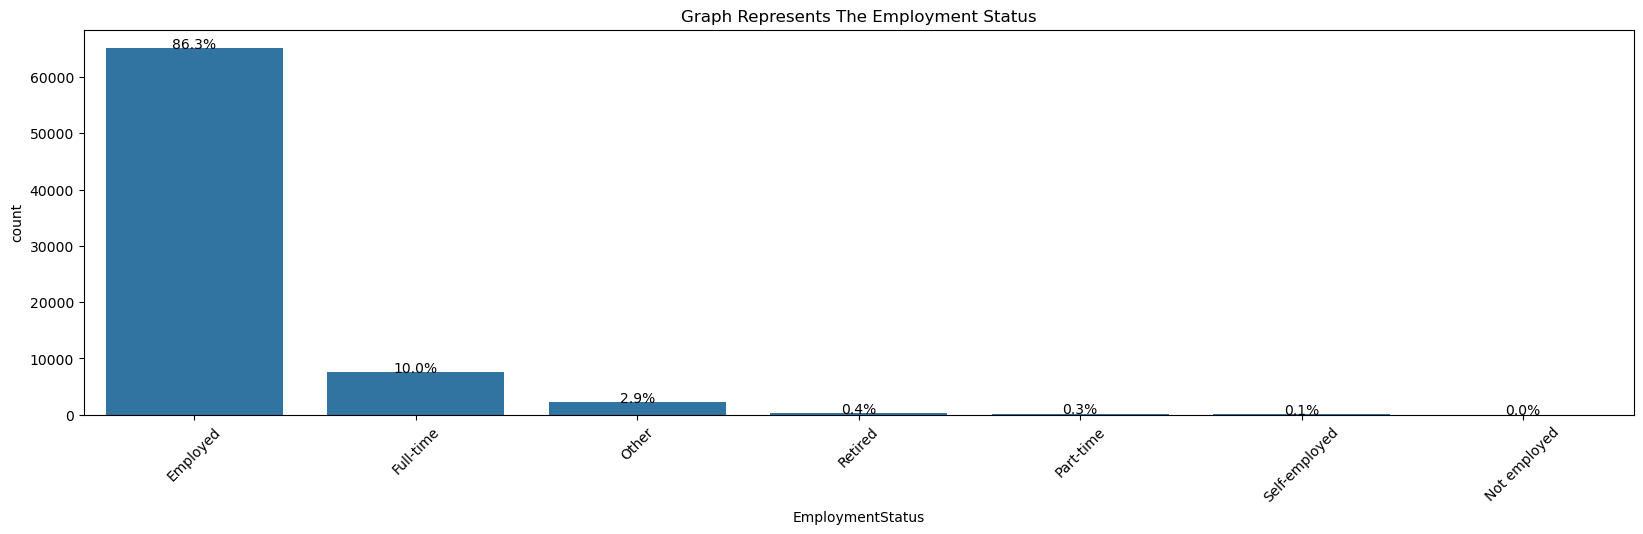

In [77]:
# plot the EmploymentStatus distribution.
base_color = sns.color_palette()[0]
order_index = df_new['EmploymentStatus'].value_counts().index
sns.countplot(data= df_new,x='EmploymentStatus',color = base_color,order=order_index);
type_count = df_new['EmploymentStatus'].value_counts()
n_count = df_new['EmploymentStatus'].value_counts().sum()
key, value = plt.xticks(rotation=45)
# iterate using ziP()function
for v, k in zip(key, value):
    label = type_count[k.get_text()]
    pct_string ='{:0.1f}%'.format(100*label/n_count)
    plt.text(v,label+1,pct_string,ha='center');
from matplotlib import rcParams
rcParams['figure.figsize']= 20,5    
plt.title("Graph Represents The Employment Status");

> From the distribution the Employes and Full-time employe is vague to my analysis so let's change the employee seasonal.

> <a href="https://fellow.app/blog/management/types-of-employees-and-how-to-manage-them/">https://fellow.app/blog/management/types-of-employees-and-how-to-manage-them/</a>

> Seasonal employees are individuals who are hired for a short period of time, based on a company’s needs. Generally, they help with increased work demand or seasonal work that arises in specific times of the year.

In [78]:
# replace Employed by Full-time
df_new['EmploymentStatus'] = df_new['EmploymentStatus'].replace(['Employed'],'seasonal')

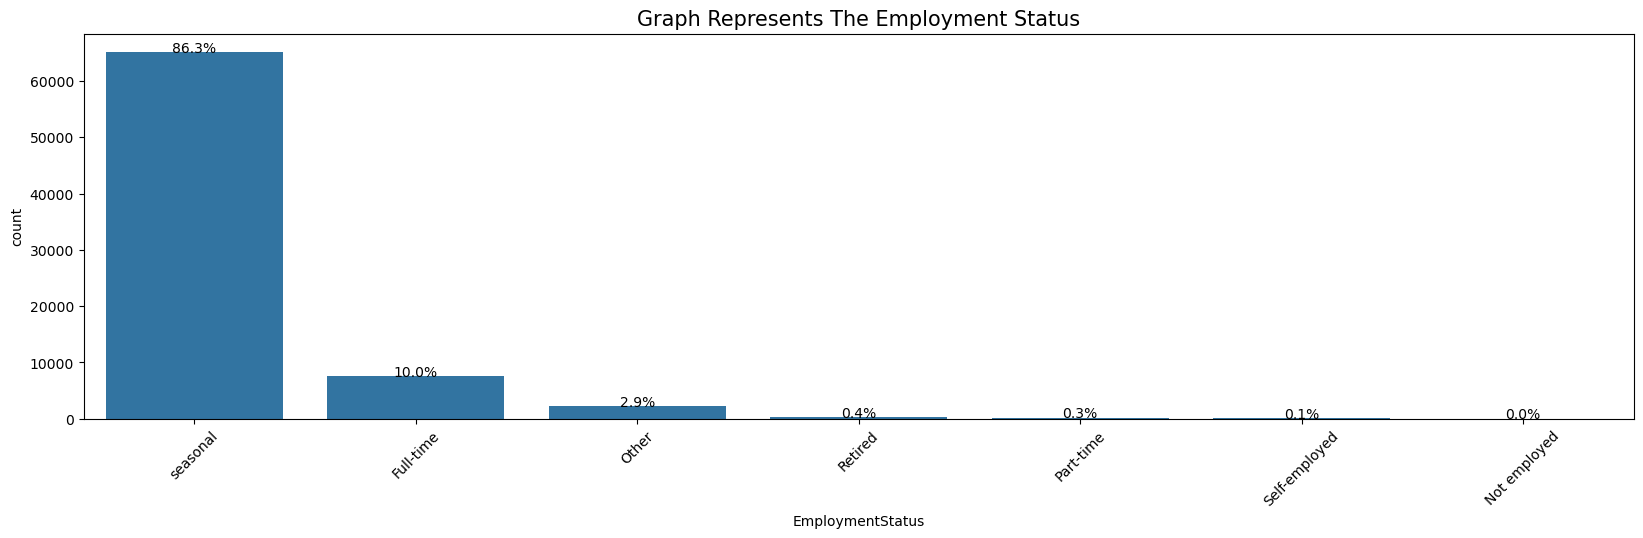

In [79]:
# plot the EmploymentStatus distribution.
plt.figure(figsize=[20,5])
base_color = sns.color_palette()[0]
order_index = df_new['EmploymentStatus'].value_counts().index
sns.countplot(data= df_new,x='EmploymentStatus',color = base_color,order=order_index);
type_count = df_new['EmploymentStatus'].value_counts()
n_count = df_new['EmploymentStatus'].value_counts().sum()
key, value = plt.xticks(rotation=45)
# iterate using ziP()function
for v, k in zip(key, value):
    label = type_count[k.get_text()]
    pct_string ='{:0.1f}%'.format(100*label/n_count)
    plt.text(v,label+1,pct_string,ha='center');
from matplotlib import rcParams
rcParams['figure.figsize']= 20,5    
plt.title("Graph Represents The Employment Status",fontsize=15);


> From  one of the categorical data type employee status distribution most of the employess are seasonal worker's which is 86.3% the second most populated is full-time emplotyess whis is 10.0% the remaining distriution is other,retired,partime,self employess with a percentage share is 2.9,0.4,0.3 and 0.1 % respecively.

> Only one person is unemployee which is not usefull for my analysis. 

## LoanStatus Distribution

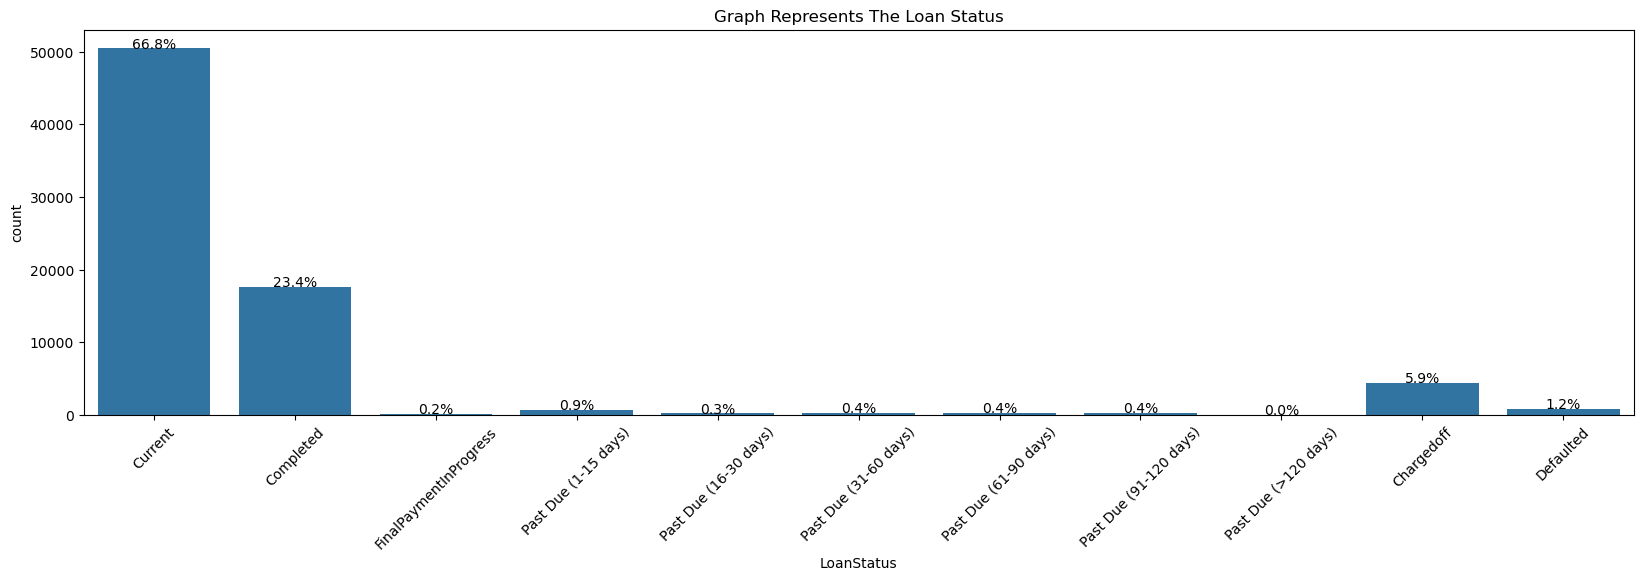

In [115]:
# plot bar chart for loan status
base_color=sns.color_palette()[0]
order_status = ['Current', 'Completed', 'FinalPaymentInProgress', 'Past Due (1-15 days)',
               'Past Due (16-30 days)','Past Due (31-60 days)',
               'Past Due (61-90 days)','Past Due (91-120 days)','Past Due (>120 days)', 
               'Chargedoff', 'Defaulted']
sns.countplot(data=df_new,x='LoanStatus',color=base_color,order=order_status)
type_count = df_new['LoanStatus'].value_counts()
n_count = df_new['LoanStatus'].value_counts().sum()
key, value = plt.xticks(rotation=45)
# iterate using ziP()function
for v, k in zip(key, value):
    label = type_count[k.get_text()]
    pct_string ='{:0.1f}%'.format(100*label/n_count)
    plt.text(v,label+1,pct_string,ha='center');
from matplotlib import rcParams
rcParams['figure.figsize']= 20,5
plt.title("Graph Represents The Loan Status");

> As we can see from the categorical loan status graph the current lone satus is 66.7% which is the hightst distrubtion indicates that most of the loan is active.

> The completed and the chargedoff is the second and the thired heigest distribution respectively.

> From the distribution from the total loan amount  around 2.6% is pass due date whis is interseting.

> Lastely only 14 peoples are on the grater then 120 day's pass due. 

## ProsperRating Distribution

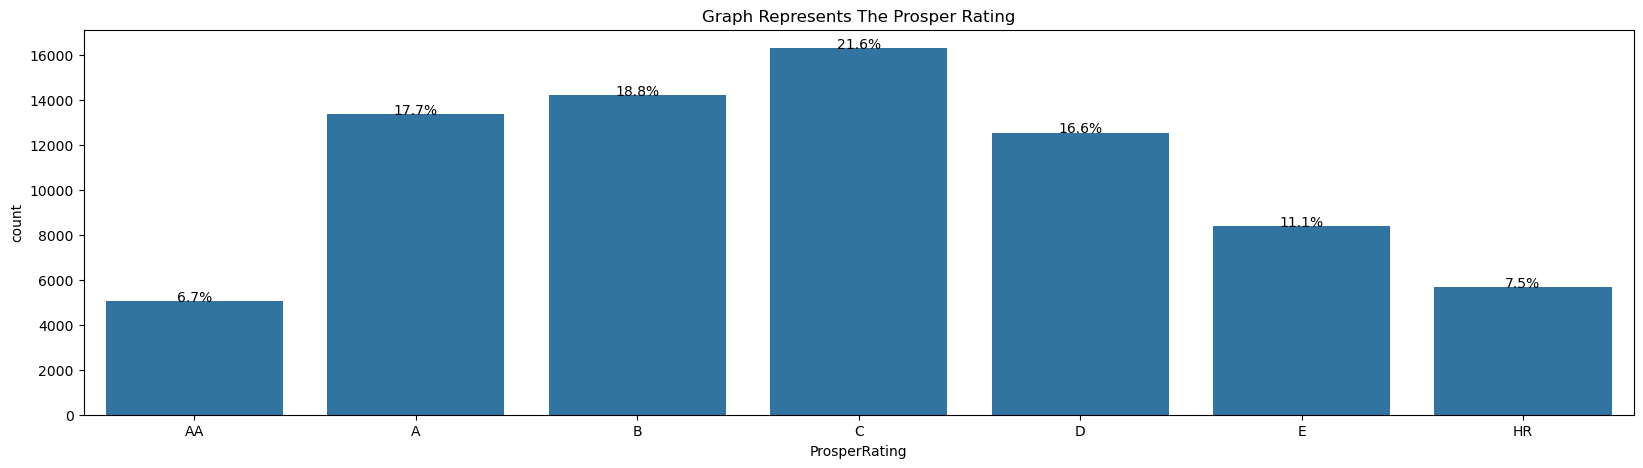

In [81]:
# plot bar chart for prosper rating 
base_color=sns.color_palette()[0]
order_prosper=['AA', 'A', 'B', 'C', 'D', 'E', 'HR']
sns.countplot(data=df_new,x='ProsperRating',color=base_color,order=order_prosper)
type_count = df_new['ProsperRating'].value_counts()
n_count = df_new['ProsperRating'].value_counts().sum()
key, value = plt.xticks(rotation=0)
# iterate using zip() function.
for v, k in zip(key, value):
    labels = type_count[k.get_text()]
    pct_string ='{:0.1f}%'.format(100*labels/n_count)
    plt.text(v,labels+1,pct_string,ha='center');
from matplotlib import rcParams
rcParams['figure.figsize']= 20,5
plt.title("Graph Represents The Prosper Rating");

<p>From the prosper rating grade <strong>C</strong> is the highst rating which is 21.6% the seond and the thired rating is <strong>B</strong> and <strong>A</strong> with 18.4% and 17.7% respectively the last is <strong>AA</strong> with 6.7%</p>

## BorrowerState Distribution

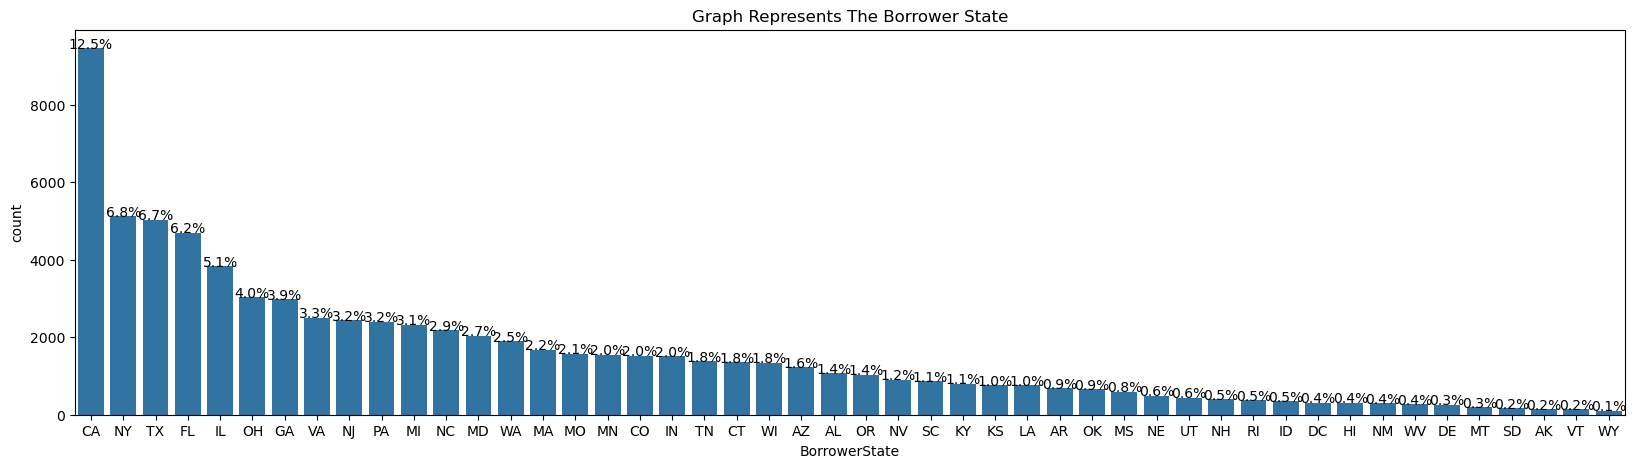

In [82]:
# plot bar chart for borrower state.

base_color=sns.color_palette()[0]
order_index = df_new['BorrowerState'].value_counts().index
sns.countplot(data=df_new,x='BorrowerState',color=base_color,order=order_index)
type_count = df_new['BorrowerState'].value_counts()
n_count = df_new['BorrowerState'].value_counts().sum()
key, value = plt.xticks(rotation=0)
# iterate using zip() function.
for v, k in zip(key, value):
    labels = type_count[k.get_text()]
    pct_string ='{:0.1f}%'.format(100*labels/n_count)
    plt.text(v,labels+1,pct_string,ha='center');
from matplotlib import rcParams
rcParams['figure.figsize']= 20,5
plt.title("Graph Represents The Borrower State");

> From the distribution most of the loan are from California which is 12.5% the sucessorrs are New york and Texas with 6.8 and 6.7 percentages respectively.

> The least state is Wyoming sate 0.1%

#### Before start the exploration of th numberical data type let's see the stastical description of each datasets and let's palys with different bin size

In [83]:
# statical distribution of the dataset.
df_new.describe()

,Term,BorrowerAPR,LenderYield,EstimatedLoss,DebtToIncomeRatio,StatedMonthlyIncome,LoanOriginalAmount,MonthlyLoanPayment,PercentFunded,Investors
count,75493.000000,75493.000000,75493.000000,75493.000000,75493.000000,75493.000000,75493.000000,75493.000000,75493.000000,75493.000000
mean,42.736519,0.224151,0.183858,0.078702,0.258006,6002.298748,9273.280211,295.905036,0.998113,70.407362
std,11.742010,0.079496,0.074200,0.046125,0.321915,5117.383698,6404.404361,189.442808,0.020670,97.917304
min,12.000000,0.045830,0.030000,0.004900,0.000000,0.250000,1000.000000,0.000000,0.700000,1.000000
25%,36.000000,0.161750,0.124900,0.042000,0.150000,3583.333333,4000.000000,158.870000,1.000000,1.000000
50%,36.000000,0.215660,0.174700,0.069900,0.220000,5041.166667,8000.000000,256.660000,1.000000,32.000000
75%,60.000000,0.288480,0.244900,0.108000,0.320000,7250.000000,14500.000000,392.420000,1.000000,101.000000
max,60.000000,0.423950,0.340000,0.366000,10.010000,483333.333333,35000.000000,2251.510000,1.012500,1189.000000


## BorrowerAPR Distribution

In [84]:
# statical distribution of the Borrower APR.
df_new["BorrowerAPR"].describe()

count    75493.000000
mean         0.224151
std          0.079496
min          0.045830
25%          0.161750
50%          0.215660
75%          0.288480
max          0.423950
Name: BorrowerAPR, dtype: float64

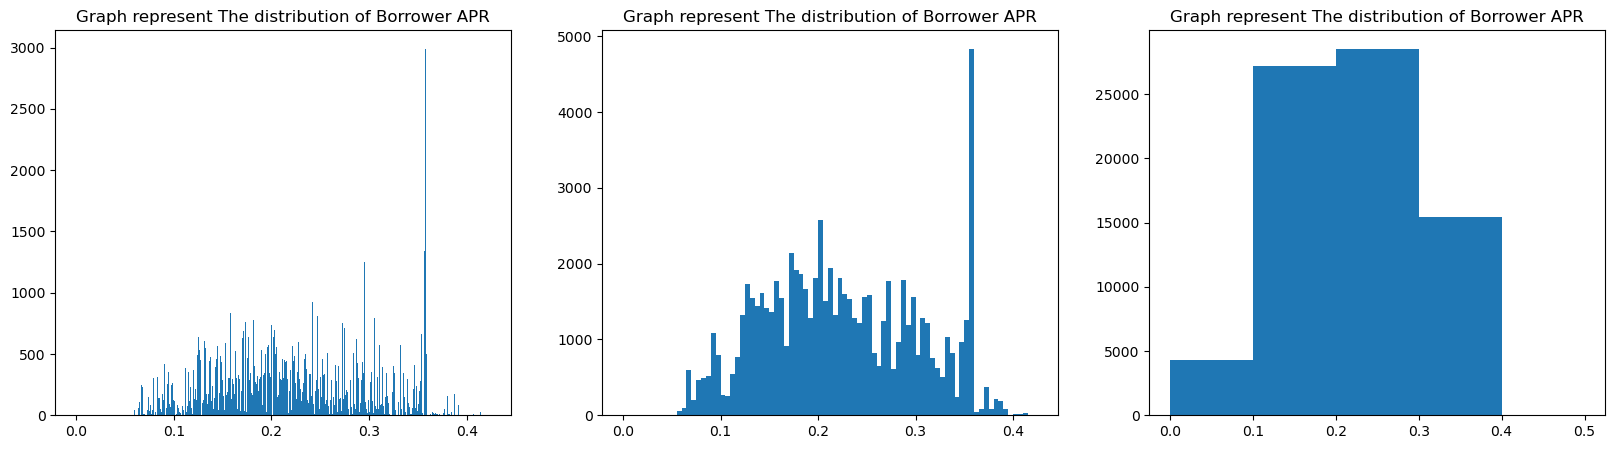

In [85]:
# Resize the chart, and have two plots side-by-side
# Set a larger figure size for subplots
plt.figure(figsize = [20, 5])
# histogram on left, example of too-large bin size
# 1 row, 2 cols, subplot 1
plt.subplot(1,3,1)
bins = np.arange(0,df_new['BorrowerAPR'].max()+0.001,0.001)
plt.hist(data=df_new,x ='BorrowerAPR',bins=bins)
plt.title('Graph represent The distribution of Borrower APR');
# histogram on right, example of too-small bin size
plt.subplot(1,3,2)
bins = np.arange(0,df_new['BorrowerAPR'].max()+0.005,0.005)
plt.hist(data=df_new,x ='BorrowerAPR',bins=bins);
plt.title('Graph represent The distribution of Borrower APR');
# histogram on right, example of too-small bin size
plt.subplot(1,3,3)
bins = np.arange(0,df_new['BorrowerAPR'].max()+0.1,0.1)
plt.hist(data=df_new,x ='BorrowerAPR',bins=bins);
plt.title('Graph represent The distribution of Borrower APR');

> I polt three graph for the borrow APR  with different bins to interpreat the distribution more clearly,So the distribution it seems multimodal it is multiple peack at different points but their is a big peak approximately around 0.35.

## DebtToIncomeRatio Distribution

In [86]:
df_new['DebtToIncomeRatio'].describe()

count    75493.000000
mean         0.258006
std          0.321915
min          0.000000
25%          0.150000
50%          0.220000
75%          0.320000
max         10.010000
Name: DebtToIncomeRatio, dtype: float64

/Users/muluneh/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


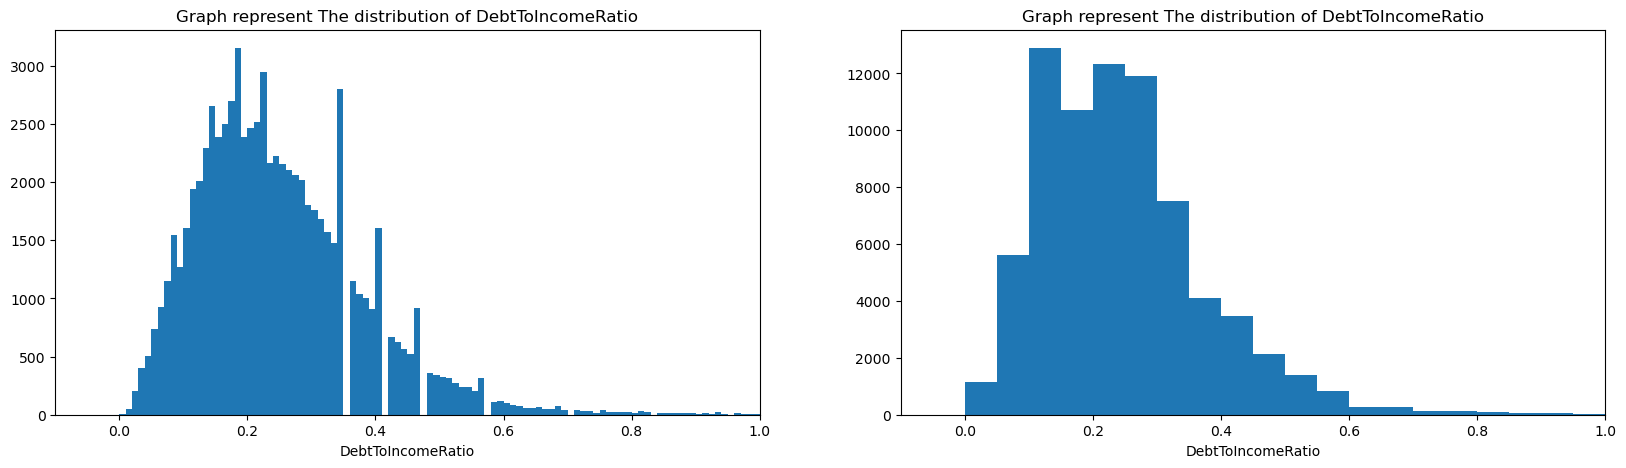

In [87]:
# distribution plot of DebtToIncomeRatio.
# get a large plot area.
plt.figure(figsize = [20, 5])
# first plot.
plt.subplot(1,2,1)
bin_edges = np.arange(0, df_new['DebtToIncomeRatio'].max()+1, 0.01)
sns.distplot(df_new['DebtToIncomeRatio'], bins = bin_edges, kde = False,hist_kws = {'alpha' : 1})
plt.xlim(-.1, 1)
plt.title("Graph represent The distribution of DebtToIncomeRatio");
# second plot.
plt.subplot(1,2,2)
bin_edges = np.arange(0, df_new['DebtToIncomeRatio'].max()+1, 0.05)
sns.distplot(df_new['DebtToIncomeRatio'], bins = bin_edges, kde = False,hist_kws = {'alpha' : 1})
plt.xlim(-.1, 1)
plt.title("Graph represent The distribution of DebtToIncomeRatio");

<p>As we can see from the  plot the DebtToIncomeRation is multimodal with the multiple peack points the distribtution is righ skewed</p>

## Monthly Loan Payment Distribution

In [88]:
df_new['MonthlyLoanPayment'].describe()

count    75493.000000
mean       295.905036
std        189.442808
min          0.000000
25%        158.870000
50%        256.660000
75%        392.420000
max       2251.510000
Name: MonthlyLoanPayment, dtype: float64

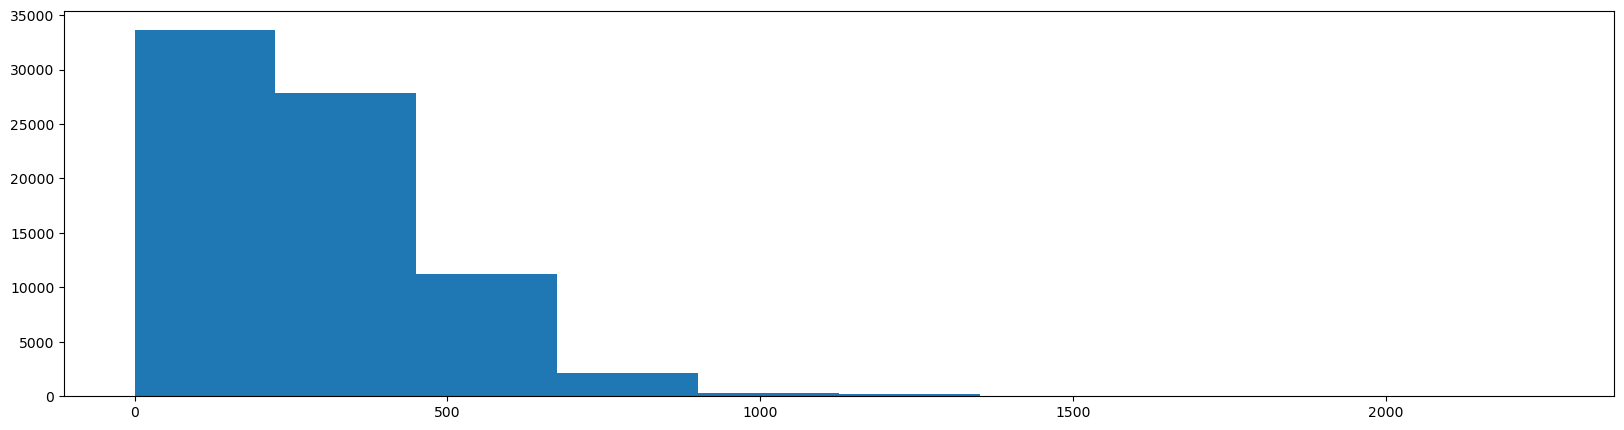

In [89]:
# plot for the MonthlyLoanPayment.
bins = np.arange(0,df_new['MonthlyLoanPayment'].max()+40,40)
plt.hist(data =df_new,x='MonthlyLoanPayment');

<p>AS we can see from the graph the distribution is right skewed to inteperate clearly we need to transform the data using log transformation scale.</p>

In [90]:
np.log10(df_new['MonthlyLoanPayment']).describe()

/Users/muluneh/opt/anaconda3/lib/python3.9/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


count    7.549300e+04
mean             -inf
std               NaN
min              -inf
25%      2.201042e+00
50%      2.409358e+00
75%      2.593751e+00
max      3.352474e+00
Name: MonthlyLoanPayment, dtype: float64

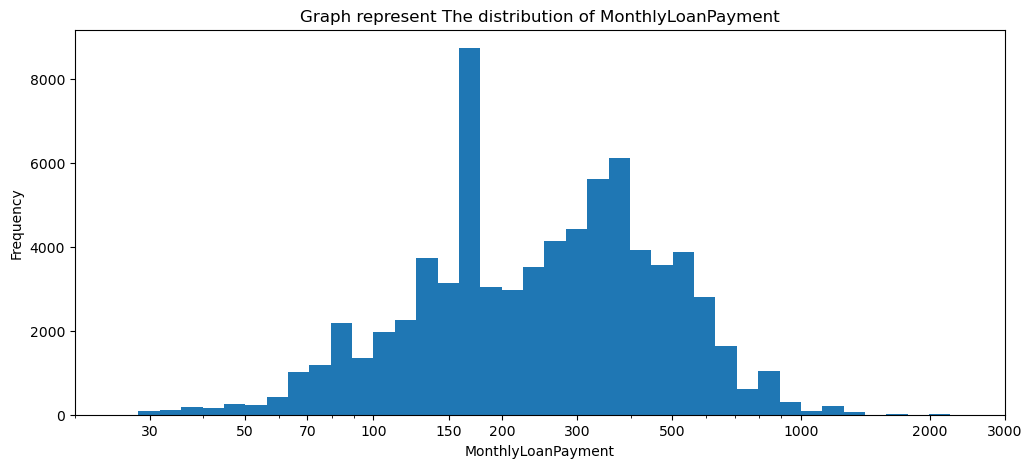

In [91]:
# Resize the plot
plt.figure(figsize=[12,5])
# Get the ticks for bins between [0 - maximum weight]
bins = 10**np.arange(0,3.36,0.05)
# Generate the x-ticks you want to apply
tickes = [30,50,70,100,150,200,300,500,1000,2000,3000]
labels = ['{}'.format(v) for v in tickes]
# Plot the histogram
plt.hist(data=df_new,x='MonthlyLoanPayment',bins = bins)
plt.xlim(20,3000)
plt.xscale('log')
plt.xlabel('MonthlyLoanPayment')
plt.ylabel("Frequency")
plt.title("Graph represent The distribution of MonthlyLoanPayment")
plt.xticks(tickes,labels);

<p>Now i can see clearly the distribution of the monthly loan payment is a multimodal their is a peack on multiple points.  </p>

## LoanOriginalAmount Distribution

In [92]:
df_new['LoanOriginalAmount'].describe()

count    75493.000000
mean      9273.280211
std       6404.404361
min       1000.000000
25%       4000.000000
50%       8000.000000
75%      14500.000000
max      35000.000000
Name: LoanOriginalAmount, dtype: float64

Text(0.5, 1.0, 'Graph represent The distribution of LoanOriginalAmount')

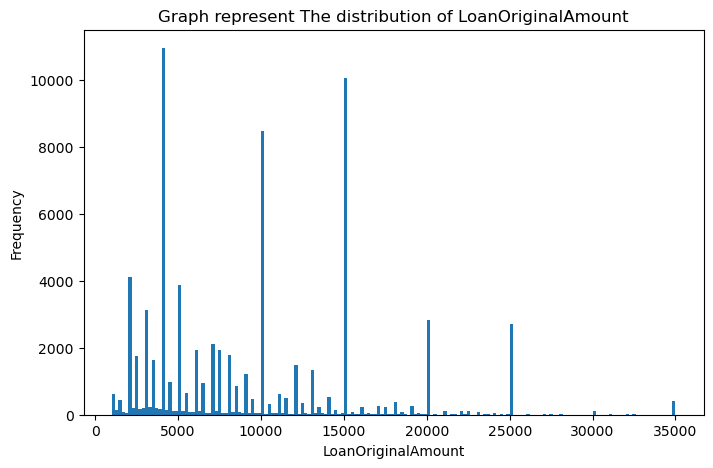

In [93]:
plt.figure(figsize=[8,5])
bins = np.arange(1000,df_new['LoanOriginalAmount'].max()+200,200)
plt.hist(data=df_new,x='LoanOriginalAmount',bins=bins);
plt.xlabel('LoanOriginalAmount')
plt.ylabel("Frequency")
plt.title("Graph represent The distribution of LoanOriginalAmount")

>I have see the distribution of the lone original amount is right skewed some data are distorted it hard to interperate so log transformation is needed to normalize.

In [94]:
np.log10(df_lone['LoanOriginalAmount']).describe()

count    113937.000000
mean          3.795130
std           0.345610
min           3.000000
25%           3.602060
50%           3.812913
75%           4.079181
max           4.544068
Name: LoanOriginalAmount, dtype: float64

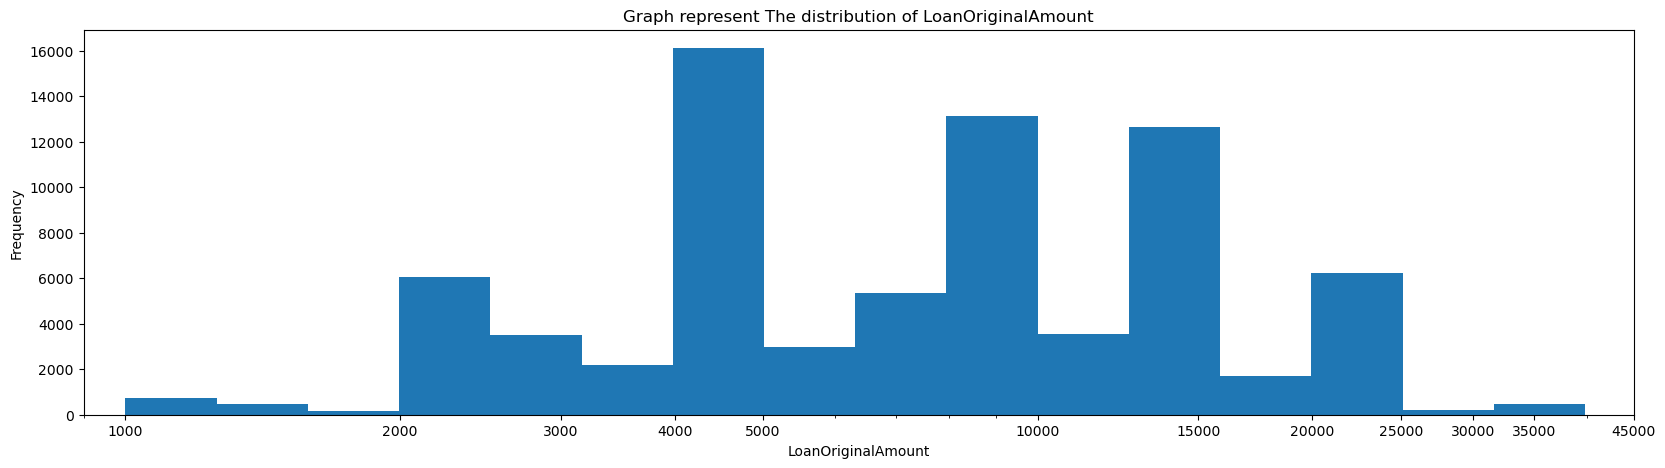

In [95]:
plt.figure(figsize=[20,5])
bins = 10**np.arange(3,4.54+0.1,0.1)
tickes = [1000,2000,3000,4000,5000,10000,15000,20000,25000,30000,35000,45000]
labels = ['{}'.format(v) for v in tickes]
plt.xlabel('LoanOriginalAmount')
plt.ylabel("Frequency")
plt.title("Graph represent The distribution of LoanOriginalAmount")
plt.hist(data=df_new,x='LoanOriginalAmount',bins=bins)
plt.xlim(900,40000)
plt.xscale('log')
plt.xticks(tickes,labels);

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?
> In the numerical disribution analysis i choose four  variables BorrowerAPR,DebtToIncomeRatio,MonthlyLoanPayment and LoneOriginalAmount.
<ul>
<p><li>The distribution of borrowers APR looks multimodal. Most of the values are at the range of 0.05 and 0.45. There are no unusual points and no need to perform any transformations.</li></p>
    <p><li>The plot the DebtToIncomeRation also a multimodal with the highest peack point is around 0.2 the distribtution is righ skewed</li></p>
  <p><li>After the log transformation scale the distribution of the monthly loan payment is a large  peack between 173.71</li></p>  
    <p><li>The lone origional amout is a mutlimodel distribution with a multiple peack and values xk multiple.</li></p>   
    
 </ul>
 
### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> The distributions of DebtToIncomeRatio is highly right screwed. Most DebtToIncomeRatio are  0.18, but some of them are Surprisingly grater than 1,So i need to perform change the data set.To confidently conclude the it must be look forwar the bivariate Exploration.


## Bivariate Exploration

In [96]:
df_new.head()

,Term,LoanStatus,BorrowerAPR,LenderYield,EstimatedLoss,ProsperRating,BorrowerState,Occupation,EmploymentStatus,DebtToIncomeRatio,IncomeRange,StatedMonthlyIncome,LoanOriginalAmount,MonthlyLoanPayment,PercentFunded,Investors
1,36,Current,0.12016,0.0820,0.0249,A,CO,Professional,seasonal,0.18,"$50,000-74,999",6125.000000,10000,318.93,1.0,1
3,36,Current,0.12528,0.0874,0.0249,A,GA,Skilled Labor,seasonal,0.15,"$25,000-49,999",2875.000000,10000,321.45,1.0,158
4,36,Current,0.24614,0.1985,0.0925,D,MN,Executive,seasonal,0.26,"$100,000+",9583.333333,15000,563.97,1.0,20
5,60,Current,0.15425,0.1214,0.0449,B,NM,Professional,seasonal,0.36,"$100,000+",8333.333333,15000,342.37,1.0,1
6,36,Current,0.31032,0.2612,0.1275,E,KS,Sales - Retail,seasonal,0.27,"$25,000-49,999",2083.333333,3000,122.67,1.0,1


## Quantitative VS Quantitative

### LoanOriginalAmount vs BorrowerAPR

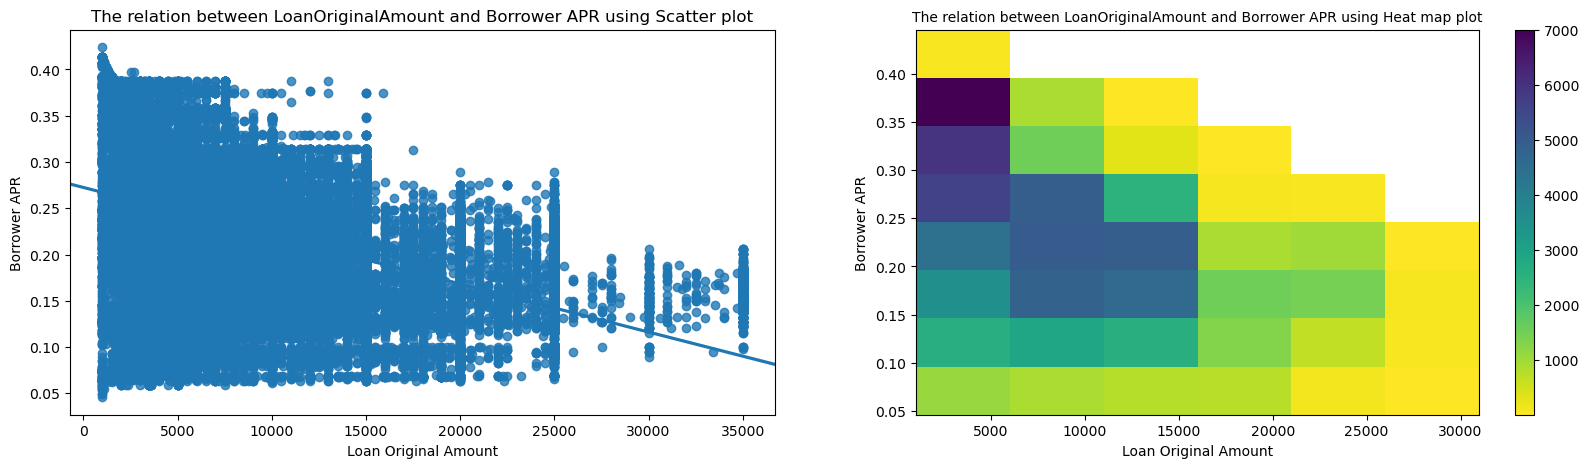

In [97]:
# let see the two quantitative variable using Scatter plot and Heat Map.
# set a larger plot area
plt.figure(figsize=[20,5])
# first plot scatter plot
plt.subplot(1,2,1)
sns.regplot(data= df_new,x='LoanOriginalAmount',y='BorrowerAPR',truncate=False,x_jitter=0.5)
plt.xlabel('Loan Original Amount')
plt.ylabel('Borrower APR')
plt.title('The relation between LoanOriginalAmount and Borrower APR using Scatter plot')
# Second plot heat map.
plt.subplot(1,2,2)
bins_x= np.arange(1000,35000+1000,5000)
bins_y= np.arange(0.046,0.423+0.05,0.05)
plt.hist2d(data=df_new,y= 'BorrowerAPR', x= 'LoanOriginalAmount',cmin=0.5, cmap='viridis_r',bins = [bins_x, bins_y]);
plt.xlabel('Loan Original Amount')
plt.ylabel('Borrower APR')
plt.colorbar()
plt.title('The relation between LoanOriginalAmount and Borrower APR using Heat map plot',fontsize=10);

> From the plot a  borrower APR is negatively correlation with the loan original amount, which mean the more the original loan amount, the lower the borrower APR(interest rate). 

> It also shows that at different size of the orginal loan amount and the borrower APR has a large range, but the range of borrower APR decrease with the increase the original loan amount.

> From the heatmap plot the color intensity is hight between 0.35 to 0.40 with the orginal loan amount is 6000/7000

### LoanOriginalAmount vs MonthlyLoanPayment

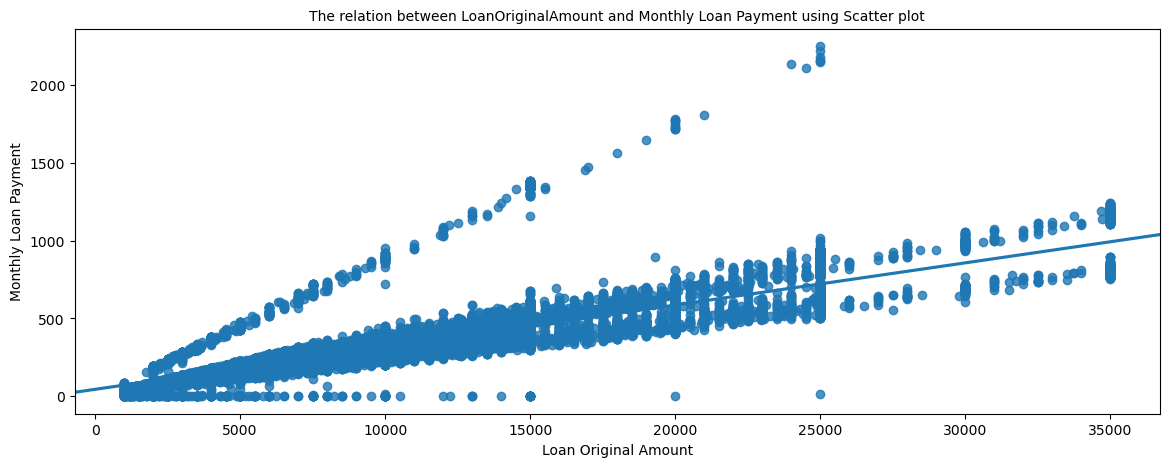

In [98]:
# Scatter plot for the quantitative variables.
plt.figure(figsize=[14,5])
sns.regplot(data= df_new,x='LoanOriginalAmount',y='MonthlyLoanPayment',truncate=False,x_jitter=0.5)
plt.xlabel('Loan Original Amount')
plt.ylabel('Monthly Loan Payment')
plt.title('The relation between LoanOriginalAmount and Monthly Loan Payment using Scatter plot',fontsize=10);

> The pearsons correlation between monthly loan payment and original loan amount is positive relation the more the original loan mount the Monthly Loan Payment increase almost linearly.

### Borrower APR vs MonthlyLoanPayment

In [99]:
df_new[['MonthlyLoanPayment','BorrowerAPR']].describe()

,MonthlyLoanPayment,BorrowerAPR
count,75493.000000,75493.000000
mean,295.905036,0.224151
std,189.442808,0.079496
min,0.000000,0.045830
25%,158.870000,0.161750
50%,256.660000,0.215660
75%,392.420000,0.288480
max,2251.510000,0.423950


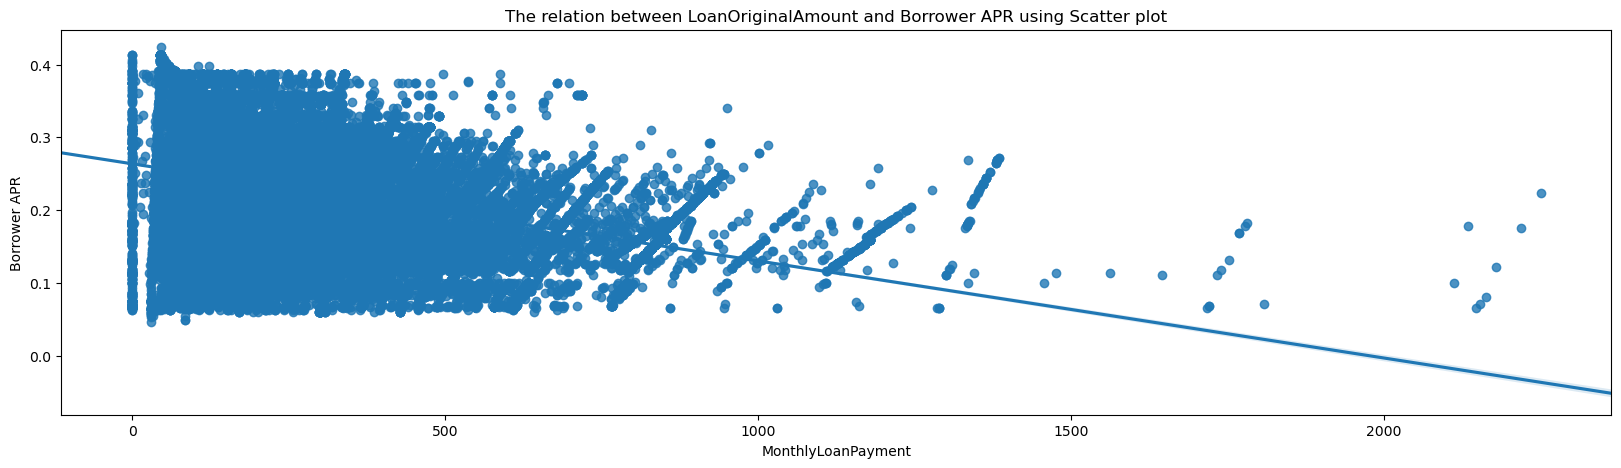

In [100]:
# scatter plot 
sns.regplot(data= df_new,x='MonthlyLoanPayment',y='BorrowerAPR',truncate=False,x_jitter=0.5)
plt.xlabel('MonthlyLoanPayment')
plt.ylabel('Borrower APR')
plt.title('The relation between LoanOriginalAmount and Borrower APR using Scatter plot');

> From the reg scatter plot the relation ship between the MonthlyLoanPayment and Borrower APR is negative it seems logical the more the MonthlyLoanPayment the less the Borrower APR interset rate beacuse the loan amount is decrased.

### Let's Summeryze the Numerical datatypes.

In [101]:
# let see the correlation of the numeric variables.
quantitative_vars = ['LoanOriginalAmount', 'BorrowerAPR','DebtToIncomeRatio', 'MonthlyLoanPayment']
df_new[quantitative_vars].corr()

,LoanOriginalAmount,BorrowerAPR,DebtToIncomeRatio,MonthlyLoanPayment
LoanOriginalAmount,1.000000,-0.419505,-0.018175,0.916931
BorrowerAPR,-0.419505,1.000000,0.129001,-0.318142
DebtToIncomeRatio,-0.018175,0.129001,1.000000,0.000541
MonthlyLoanPayment,0.916931,-0.318142,0.000541,1.000000


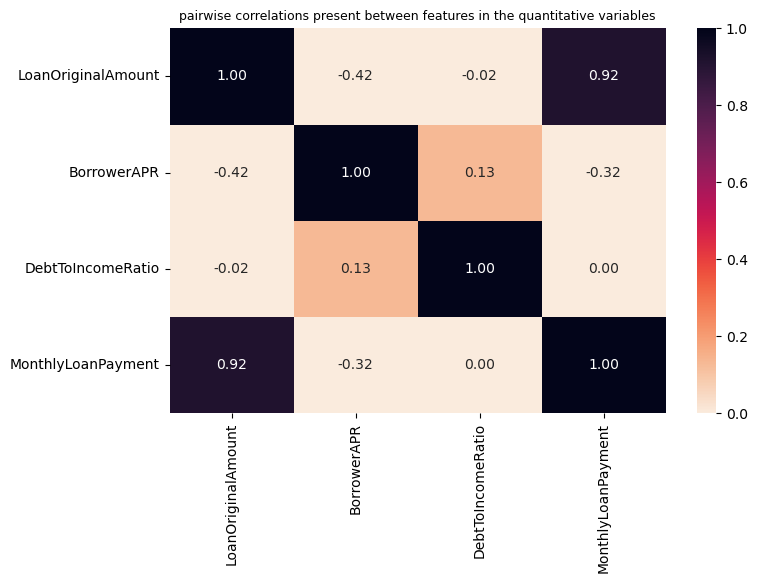

In [102]:
# lets put the correlation in to heatpmap.
plt.figure(figsize = [8, 5])
sns.heatmap(df_new[quantitative_vars].corr(), annot = True, fmt = '.2f',cmap = 'rocket_r', vmin = 0)
plt.title("pairwise correlations present between features in the quantitative variables",fontsize=9);

> From the correlation matrix what i come up wit the follwing conclusions.
      <ol>
           <li>Their is no correlaton relation between DebateToIncomeration and monthly loan payment.</li>
            <li>Their is strong positive correlation between the original loan  amout and Monthly loan     payments</li>
        <li>The last conclusion from the pair correlation plot is negative correltion between orginal loan amout and borrower APR.</li>
         </ol>

## Qualitative VS Qualitative

### Borrower State vs Employment Status

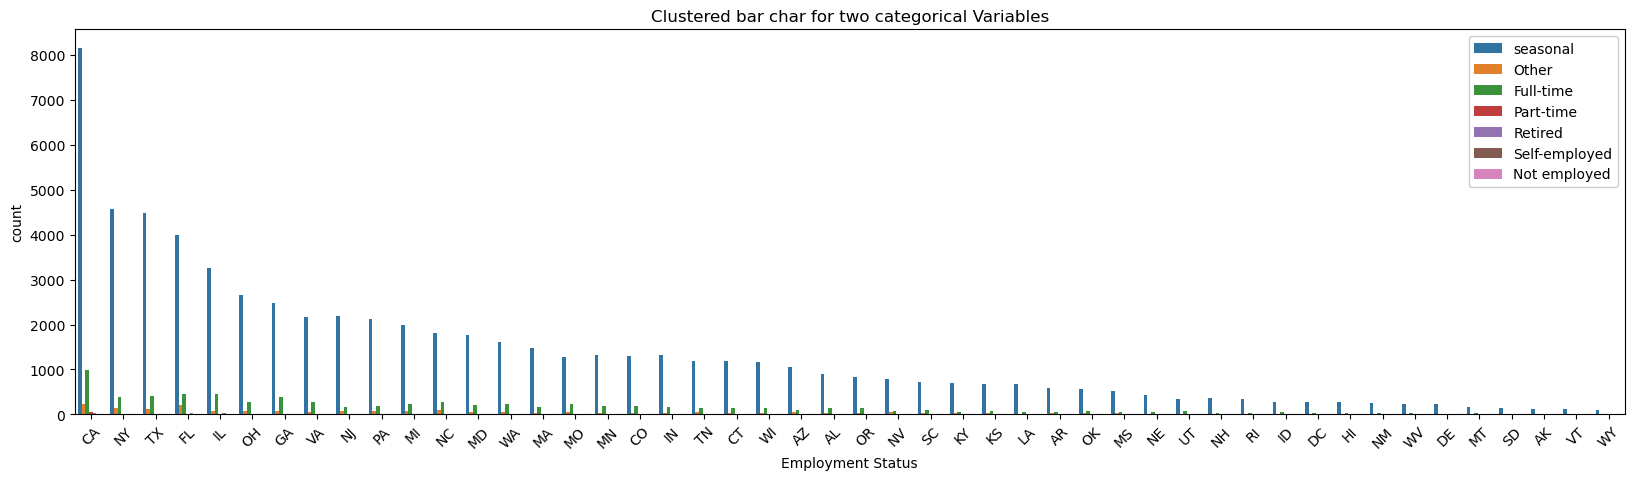

In [103]:
# plot a cluster bar chart
plt.figure(figsize=[20,5])
order_index = df_new['BorrowerState'].value_counts().index
ax = sns.countplot(data=df_new,x='BorrowerState',hue = 'EmploymentStatus',order=order_index);
ax.legend(loc=1,framealpha=1)
plt.xticks(rotation =45)
plt.xlabel('Employment Status')
plt.title('Clustered bar char for two categorical Variables');

>From the cluster bar chart of the Borrower State vs Employment Status most of the seasonal,full-time and other employees are in  california state.

> Relatively smaller than the california state the second and thired most populated employess is in New york and Texas states respectively. 

### LoanStatus vs EmploymentStatus

In [104]:
df_new[['LoanStatus','EmploymentStatus']]

,LoanStatus,EmploymentStatus
1,Current,seasonal
3,Current,seasonal
4,Current,seasonal
5,Current,seasonal
6,Current,seasonal
...,...,...
113932,Current,seasonal
113933,FinalPaymentInProgress,seasonal
113934,Current,seasonal
113935,Completed,Full-time


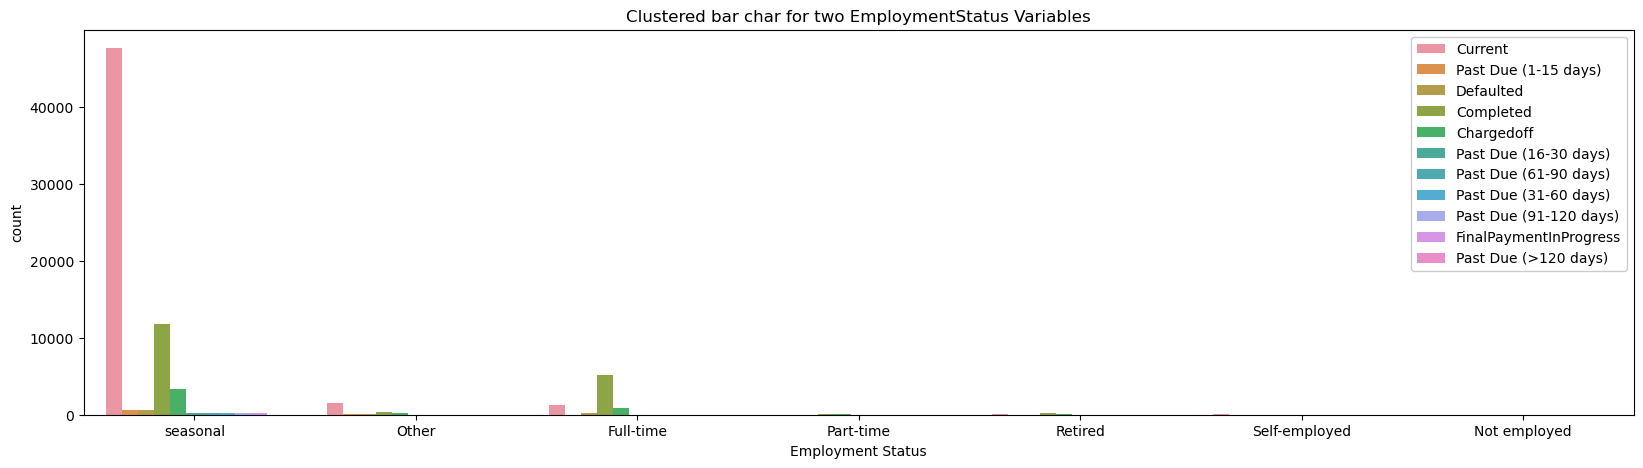

In [105]:
# plot a cluster bar chart
plt.figure(figsize=[20,5])
#order_index = df_new['BorrowerState'].value_counts().index
ax = sns.countplot(data=df_new,x='EmploymentStatus',hue = 'LoanStatus');
ax.legend(loc=1,framealpha=1)
plt.xlabel('Employment Status')
plt.title('Clustered bar char for two EmploymentStatus Variables');

> From the cluster bar chart clearly see that seasonal employess are current(active) loan status , complted loans status chargedoff their loans.

> The second point here is the full-time employess are completed or current(active) loan status .

### LoanStatus vs BorrowerState

In [106]:
df_new[['LoanStatus','BorrowerState']]

,LoanStatus,BorrowerState
1,Current,CO
3,Current,GA
4,Current,MN
5,Current,NM
6,Current,KS
...,...,...
113932,Current,IL
113933,FinalPaymentInProgress,PA
113934,Current,TX
113935,Completed,GA


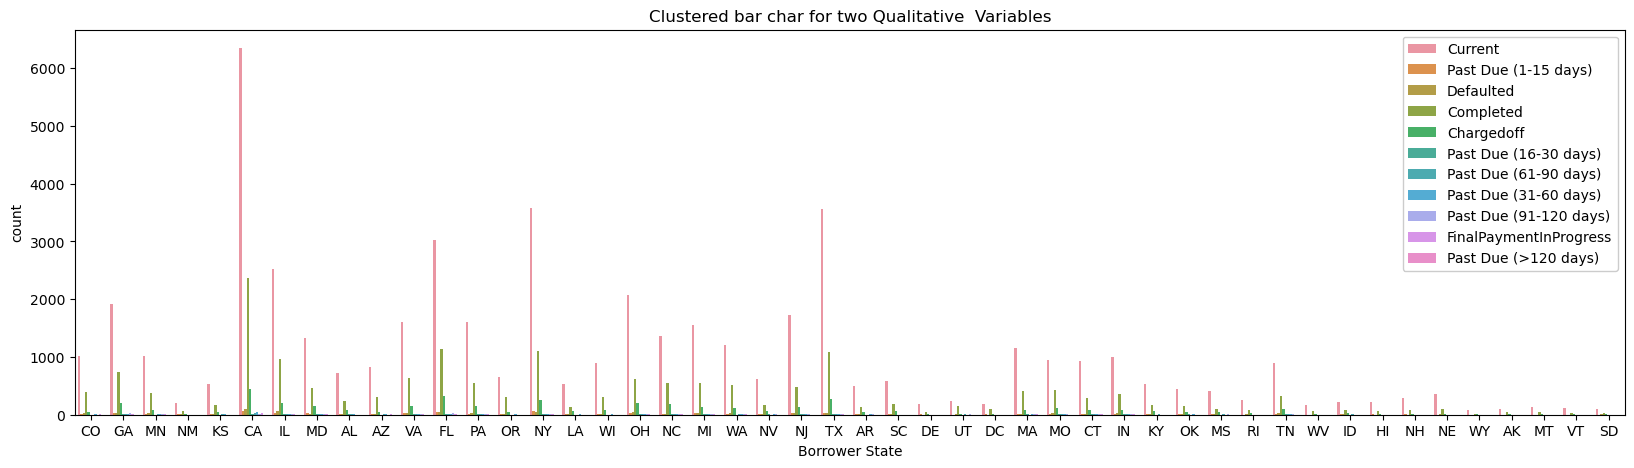

In [107]:
#plot a cluster bar chart
plt.figure(figsize=[20,5])
ax = sns.countplot(data=df_new,x='BorrowerState',hue = 'LoanStatus');
ax.legend(loc=1,framealpha=1)
plt.xlabel('Borrower State')
plt.title('Clustered bar char for two Qualitative  Variables');

> From the cluster bar chart i make the following poins.
> * All over the state's all the loan staus is current or complted whis is very interesting points.
> * Their is no past due loan is is interting all the customers are pays their loan on time.

## Qualitative VS Quanitative
### EmploymentStatus vs MonthlyLoanPayment

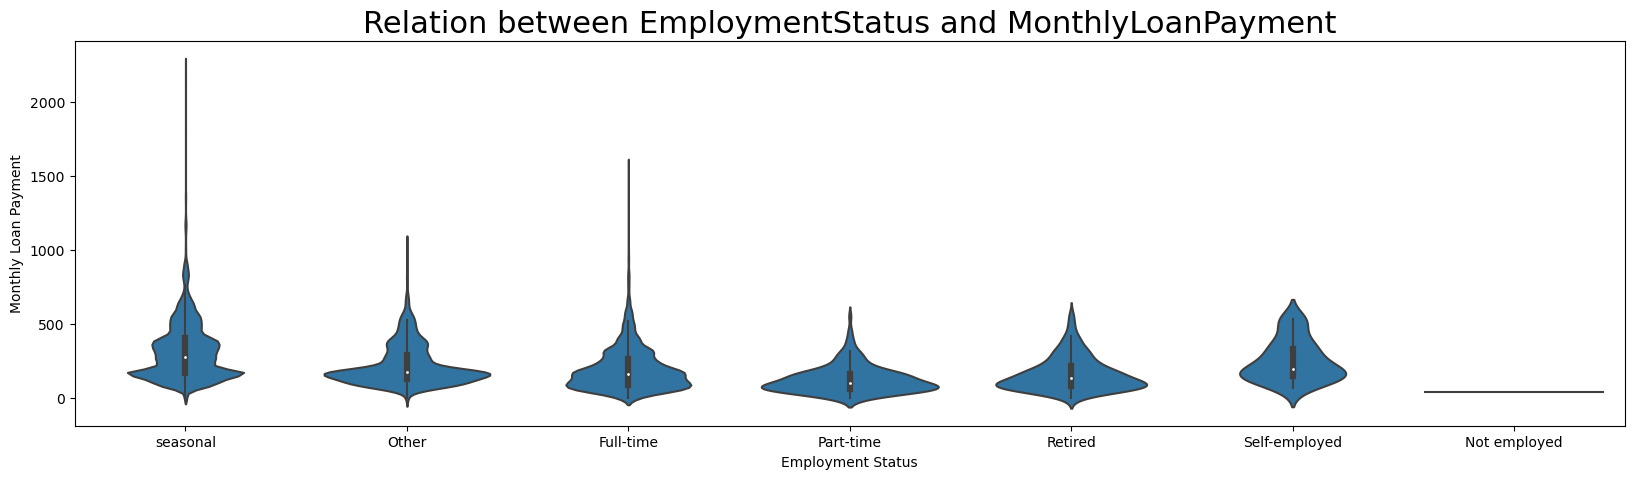

In [108]:
# let see the qualitative and quantitative variable using violin plot and box plot BorrowerAPR
base_color = sns.color_palette()[0]
sns.violinplot(data= df_new ,x='EmploymentStatus',y='MonthlyLoanPayment',color = base_color);
plt.xlabel('Employment Status')
plt.ylabel('Monthly Loan Payment')
plt.title('Relation between EmploymentStatus and MonthlyLoanPayment',fontsize=22);


> Here is some points on the viloin plot's for each plot.
<ui>
    <li>The seasonal employee are more dense outliars.</li>
    <li>The median of the other employes is the lower boundery for thw seasonal employess.</li>
    <li>Their is no outliers in the Retired and self-employess.</li>
      </ui>

### LoanStatus vs BorrowerAPR

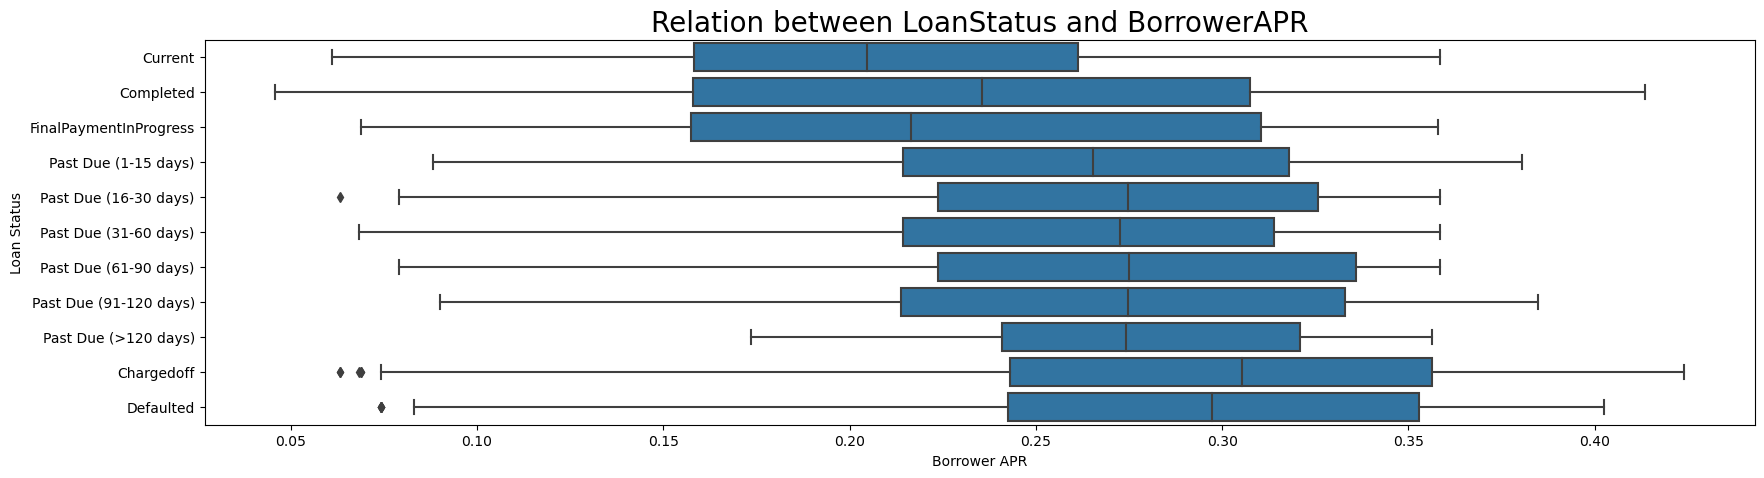

In [116]:
# box plot.
sns.boxplot(data= df_new ,y='LoanStatus',x='BorrowerAPR',color = base_color,order=order_status)
plt.xlabel('Borrower APR')
plt.ylabel('Loan Status')
plt.title('Relation between LoanStatus and BorrowerAPR',fontsize=20);

### BorrowerState vs LoanOriginalAmount

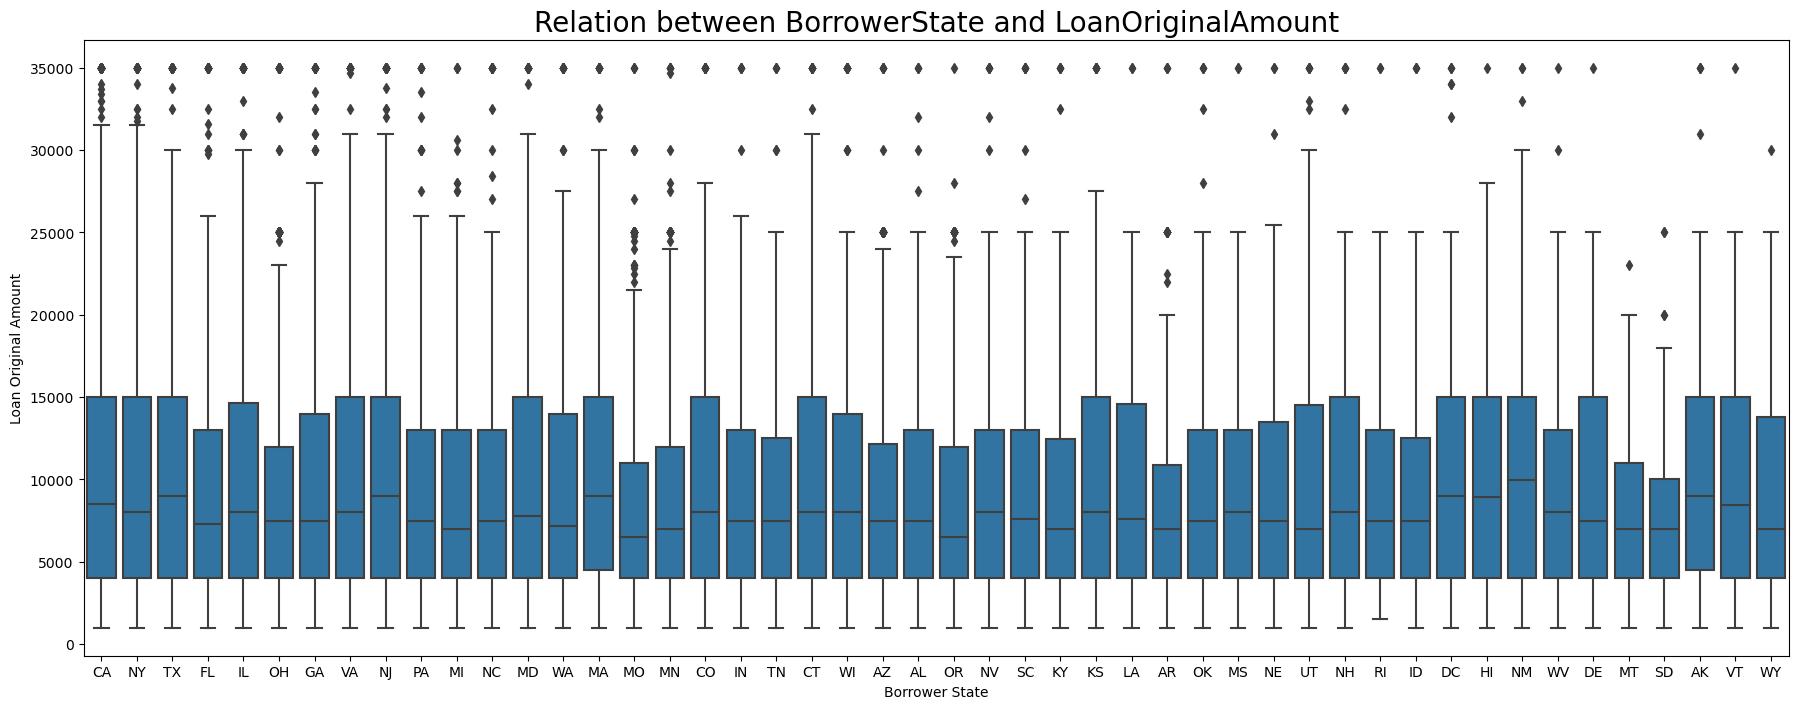

In [110]:
# box plot.
plt.figure(figsize=[22,8])
order_index = df_new['BorrowerState'].value_counts().index
sns.boxplot(data= df_new ,y='LoanOriginalAmount',x='BorrowerState',color = base_color,order=order_index)
plt.xlabel('Borrower State')
plt.ylabel('Loan Original Amount')
plt.title('Relation between BorrowerState and LoanOriginalAmount',fontsize=20);

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

<p>The borrower APR is negatively associated with the loan original amount, which mean the more the loan amount, the lower the APR. It also shows that at different size of the loan amount, the APR has a large range, but the range of APR decrease with the increase of loan amount. The Monthly loan payment also has a strong effect on the borrower APR, which decreases with the better rating.</P>

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?
<p>The loan original amount is positively correlated with the stated monthly income, it makes sense since borrowers with more monthly income could loan more money. It also shows that borrowers with better rating also have larger monthly income and loan amount.</P>

## Multivariate Exploration

In [111]:
df_new.head()

,Term,LoanStatus,BorrowerAPR,LenderYield,EstimatedLoss,ProsperRating,BorrowerState,Occupation,EmploymentStatus,DebtToIncomeRatio,IncomeRange,StatedMonthlyIncome,LoanOriginalAmount,MonthlyLoanPayment,PercentFunded,Investors
1,36,Current,0.12016,0.0820,0.0249,A,CO,Professional,seasonal,0.18,"$50,000-74,999",6125.000000,10000,318.93,1.0,1
3,36,Current,0.12528,0.0874,0.0249,A,GA,Skilled Labor,seasonal,0.15,"$25,000-49,999",2875.000000,10000,321.45,1.0,158
4,36,Current,0.24614,0.1985,0.0925,D,MN,Executive,seasonal,0.26,"$100,000+",9583.333333,15000,563.97,1.0,20
5,60,Current,0.15425,0.1214,0.0449,B,NM,Professional,seasonal,0.36,"$100,000+",8333.333333,15000,342.37,1.0,1
6,36,Current,0.31032,0.2612,0.1275,E,KS,Sales - Retail,seasonal,0.27,"$25,000-49,999",2083.333333,3000,122.67,1.0,1


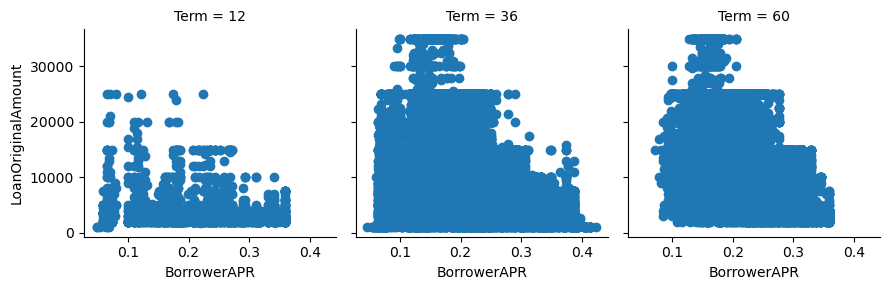

In [112]:
# multivariant plot 
g = sns.FacetGrid(data=df_new,col='Term',margin_titles=True)
g.map(plt.scatter,'BorrowerAPR','LoanOriginalAmount');

> Due to the high number of data points and their high amount of overlap specially on the term 36 and 60 but the  relationship between the ratings and the amount of loan over the tem 36 and 60 is a high correlation.

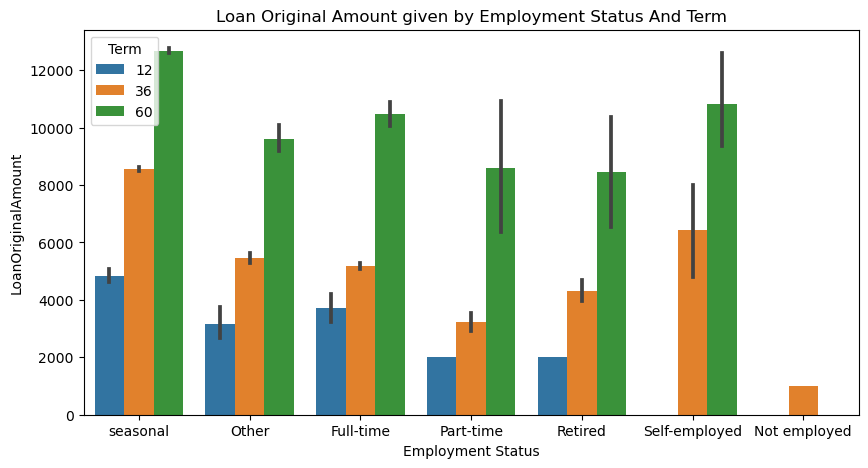

In [113]:
# plot on seborn barpolt.
plt.figure(figsize = [10, 5])
sns.barplot(data=df_new, x='EmploymentStatus', y='LoanOriginalAmount', hue="Term")
plt.xlabel('Employment Status')
plt.ylabel('LoanOriginalAmount')
plt.title('Loan Original Amount given by Employment Status And Term');

> We can observe from the graph that there is a correlation between the employment status  and the loan amount granted. The loan amount increases as the loan tem is increased. Additionally, it appears that the majority of borrowers favored long periods.

<Figure size 2000x500 with 0 Axes>

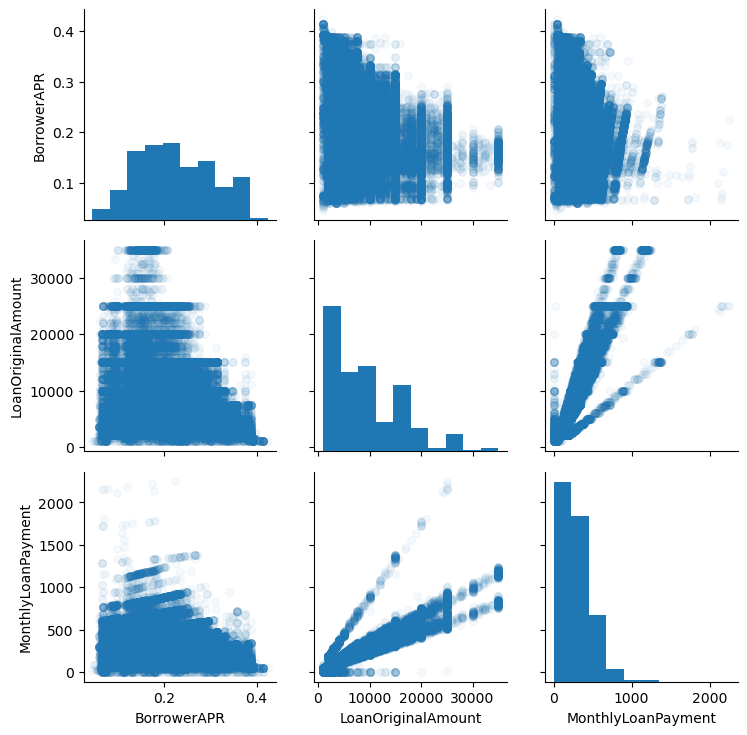

In [114]:
# plot on three numeerical variables.
plt.figure(figsize=[20,5])
g = sns.PairGrid(data = df_new, vars = ['BorrowerAPR', 'LoanOriginalAmount', 'MonthlyLoanPayment'])
g.map_diag(plt.hist)
g.map_offdiag(plt.scatter,alpha=1/25,s=30);

> I set up my PairGrid to plot scatterplots off the diagonal and histograms on the diagonal.

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

>I make the decision to start with the borrower's rate because I believe it has an impact on the maximum amount to which the borrower may be entitled. I saw that the borrower rate had an impact on the amount, causing borrowing to rise with better ratings across all conditions.

### Were there any interesting or surprising interactions between features?

> By analyzing the data, I was able to determine that borrowers with full-time jobs experienced the lowest interest rates over time, while those who are self-employed or unemployed experienced higher rates. 

> Also those employed and those with full time job got lowest interests over time

## Conclusions
> According to my investigation, the following characteristics have an impact on how loan outcome status,borrower APR.

> Borrowers Rate - The amount increases with better ratings.

> Better economic ratings do not necessarily translate into bigger borrowing amounts, but it appears that middle ratings borrowers borrowed more money.

> seasonal employee borrowers received better interest rates than unemployed borrowers, on average.

>  MonthlyLoanPayment - Borrowers with high monthlyLoanPayment range borrowed less amount compared with those borrowers with less monthlyLoanPayment